In [56]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt

In [57]:
import pinyin
from unidecode import unidecode
df = gpd.read_file("./data/beijing-line.json")
def translate_to_english(short_name):
    short_name = pinyin.get(short_name, format="diacritical")
    if "hàoxiàn" in short_name:
        line_number = short_name.split('hàoxiàn')[0]
        return "Line "+line_number 
    elif "xiàn" in short_name: 
        line_name = short_name.split('xiàn')[0]
        return line_name[0].upper() + unidecode(line_name[1:]).lower()+" Line"
    else: return unidecode(short_name)


df['short'] = df['short'].apply(lambda x: translate_to_english(x))
df['short'] = df['short'].str.replace("Daxingguojijichang", "Daxing Airport")
df['short'] = df['short'].str.replace("Shoudujichang", "Capital Airport")
df['color'] = df['color'].apply(lambda x: "#"+str(x))
df.head(40)

,name,short,color,ls,geometry
0,S1线,S1 Line,#B35A1F,900000069871,"LINESTRING (116.15695 39.92228, 116.12772 39.9..."
1,地铁1号线,Line 1,#CC0000,110100023110,"LINESTRING (116.17121 39.92542, 116.18419 39.9..."
2,地铁2号线,Line 2,#0065B3,110100023098,"LINESTRING (116.36691 39.94727, 116.38753 39.9..."
3,地铁4号线大兴线,Line 4,#008187,110100023076,"LINESTRING (116.31386 39.66908, 116.31558 39.6..."
4,地铁5号线,Line 5,#A61D7F,110100023100,"LINESTRING (116.42214 39.84446, 116.41589 39.8..."
5,地铁6号线,Line 6,#D0970A,110100023339,"LINESTRING (116.74136 39.90143, 116.72779 39.9..."
6,地铁7号线,Line 7,#F9BE58,110100023054,"LINESTRING (116.68952 39.85556, 116.6784 39.86..."
7,地铁8号线,Line 8,#018237,110100023114,"LINESTRING (116.40456 39.9223, 116.39795 39.93..."
8,地铁8号线南段,Line 8,#018237,900000040279,"LINESTRING (116.39186 39.88987, 116.39247 39.8..."
9,地铁9号线,Line 9,#86B81C,110100023116,"LINESTRING (116.29583 39.81307, 116.29113 39.8..."


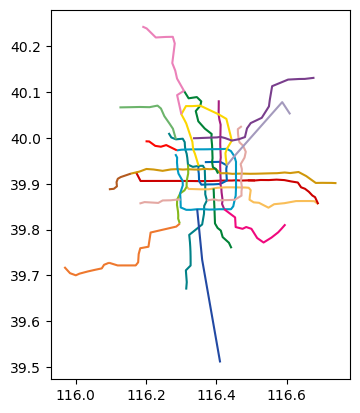

In [58]:
df.plot(color=df["color"])
df.to_file("../geojson/beijing_metro/beijing_lines.geojson")

In [59]:
df_2 = gpd.read_file("./data/shanghai-line.json")
df_2['short'] = df_2['short'].apply(lambda x: translate_to_english(x))
df_2['short'] = df_2['short'].str.replace("cixuanfu", "Maglev Line")
df_2['color'] = df_2['color'].apply(lambda x: "#"+str(x))
df_2.head(20)

,name,short,color,ls,geometry
0,地铁1号线,Line 1,#E3002A,310100025685,"LINESTRING (121.38074 31.11306, 121.38838 31.1..."
1,地铁2号线,Line 2,#86B81C,310100025693,"LINESTRING (121.80129 31.15306, 121.79256 31.1..."
2,地铁3号线,Line 3,#FCD600,310100034534,"LINESTRING (121.43518 31.40965, 121.45655 31.4..."
3,地铁4号线,Line 4,#5A2B8D,310100034536,"LINESTRING (121.42256 31.18858, 121.41617 31.1..."
4,地铁5号线,Line 5,#96499A,310100034538,"LINESTRING (121.36511 31.00261, 121.37616 31.0..."
5,地铁5号线,Line 5,#96499A,900000059516,"LINESTRING (121.38074 31.11306, 121.38119 31.1..."
6,地铁6号线,Line 6,#F0087D,310100024540,"LINESTRING (121.47579 31.15535, 121.49084 31.1..."
7,地铁7号线,Line 7,#EE782E,310100024542,"LINESTRING (121.55851 31.21339, 121.55338 31.2..."
8,地铁8号线,Line 8,#01A2E2,310100025709,"LINESTRING (121.50788 31.06356, 121.5062 31.07..."
9,地铁9号线,Line 9,#69C7F4,310100024546,"LINESTRING (121.67874 31.27335, 121.66385 31.2..."


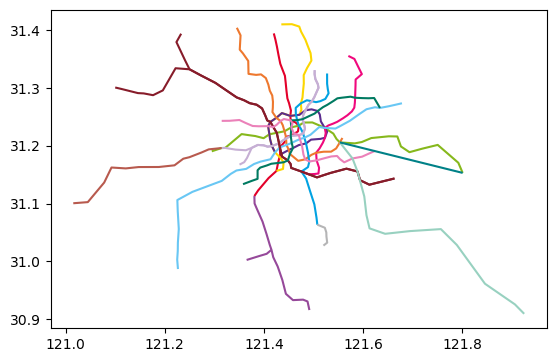

In [60]:
df_2.plot(color=df_2.color)
df_2.to_file("../geojson/shanghai_metro/shanghai_lines.geojson")

In [61]:
from shapely.ops import linemerge
from shapely import LineString, MultiPoint, Point

dfny = gpd.read_file("../nyc_metro/NYC_subway_lines.geojson")
dfny['name'] = dfny['name'].str.split("-")
dfny = dfny.explode("name")
df_g = dfny.groupby("name").agg({
    'geometry': lambda x: linemerge(list(x))
}).reset_index()
#t_df = dfs[0]
#t_df = t_df[['name', 'geometry']]

def merge_lines(lines):
    last = None
    points = []
    if isinstance(lines, LineString):
        return lines
    else:
        coords = [list(line.coords) for line in lines.geoms]
        outline = sorted([point for segment in coords for point in segment], key=lambda x: x[1], reverse=True)
        print(outline)
        mpoints = MultiPoint(outline)
        #outline = LineString([i for sublist in outcoords for i in sublist])
    return mpoints

#df_g['geometry'] = df_g['geometry'].apply(merge_lines)
df_g = gpd.GeoDataFrame(df_g, geometry="geometry")
#df_g[df_g["name"] == "2"].plot()
#df_g.plot()


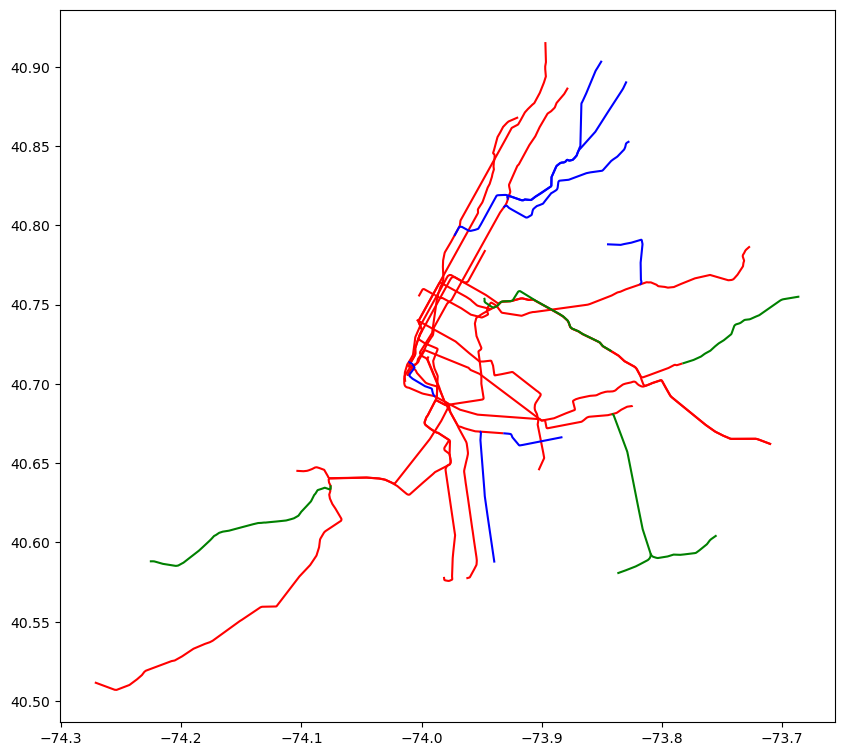

In [87]:
ny_lines = gpd.read_file("../nyc_metro/MTA-New-York-city-Subway.kml")
ny_lines = ny_lines[['Name', 'geometry']]
subway = pd.concat([ny_lines[ny_lines['Name'].str.match(r'[\w]+[ ]Line')], ny_lines[ny_lines['Name']=="J and Z lines"]])
subway = gpd.GeoDataFrame(subway)
ind= ny_lines[ny_lines["Name"].str.contains("IND")]
irt= ny_lines[ny_lines["Name"].str.contains("IRT")]
bmt= ny_lines[ny_lines["Name"].str.contains("BMT")]


fig, ax = plt.subplots(figsize=(10, 10))
#ny_lines.plot(ax=ax)
subway.plot(ax=ax, color='red')
ind.plot(ax=ax, color="green")
irt.plot(ax=ax, color="blue")
#bmt.plot(ax=ax, color="cyan")
#df_g[df_g['name']=="2"].plot(ax=ax, color="brown")

#f_g.plot(ax=ax, color="red")
plt.show()